
# Step 1 and Step 2

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('foo.db')

# Step 3 : Merge the dataset

In [2]:
# Mengambil data dari tabel users dan orders ke dalam pandas DataFrame
olist_order_reviews_dataset_df = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", conn)
olist_orders_dataset_df = pd.read_sql_query("SELECT * FROM olist_orders_dataset", conn)
olist_order_payments_dataset_df = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", conn)
olist_order_items_dataset_df = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", conn)
olist_customers_dataset_df = pd.read_sql_query("SELECT * FROM olist_customers_dataset", conn)


# Menggabungkan olist_order_reviews_dataset_df dan olist_orders_dataset_df berdasarkan 'order_id'
merged_df_1 = pd.merge(olist_order_reviews_dataset_df, olist_orders_dataset_df, on='order_id', how='outer')

# Menggabungkan hasil penggabungan pertama dengan olist_order_payments_dataset_df
merged_df_2 = pd.merge(merged_df_1, olist_order_payments_dataset_df, on='order_id', how='outer')
#merged_df_2

# Menggabungkan hasil penggabungan kedua dengan olist_order_items_dataset_df
merged_df_3 = pd.merge(merged_df_2, olist_order_items_dataset_df, on='order_id', how='outer')
#merged_df_3

# Menggabungkan hasil penggabungan kedua dengan olist_customers_dataset_df
merged_df_4 = pd.merge(merged_df_3, olist_customers_dataset_df, on='customer_id', how='outer')


In [3]:
print(merged_df_4.columns)


Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')


In [4]:
# Membaca Data dari Tabel
df = pd.read_sql_query("""SELECT DISTINCT * 
FROM olist_customers_dataset ocd
LEFT JOIN olist_orders_dataset ood ON ocd.customer_id = ood.customer_id
LEFT JOIN olist_order_items_dataset ooid ON ooid.order_id = ood.order_id
LEFT JOIN olist_products_dataset opd ON opd.product_id = ooid.product_id
LEFT JOIN olist_sellers_dataset osd ON osd.seller_id = ooid.seller_id
LEFT JOIN olist_order_payments_dataset oopd ON oopd.order_id = ood.order_id
LEFT JOIN olist_order_reviews_dataset oord ON oord.order_id = ood.order_id;""", conn)

# Mengubah Nama Kolom
df.rename(columns={'state': 'customer_state', 'city': 'customer_city'}, inplace=True)

# Mengelompokkan Data dan Menghitung Jumlah ID Pelanggan Unik
grouped_df = df.groupby('customer_state')['customer_id'].nunique().reset_index()

# Mengubah Nama Kolom untuk Kejelasan
grouped_df.rename(columns={'customer_id': 'unique_customer_count'}, inplace=True)

# Verifikasi DataFrame
print(grouped_df.head())
print(grouped_df.shape)



# Menutup Koneksi ke Database
conn.close()

  customer_state  unique_customer_count  unique_customer_count
0             AC                     81                     81
1             AL                    413                    413
2             AM                    148                    148
3             AP                     68                     68
4             BA                   3380                   3380
(27, 3)


# Step 4 Deal Null Values

## 4.1 Null Value Identication

In [5]:
# Identifikasi Nilai Null
null_counts = df.isnull().sum()
print("Jumlah nilai null di setiap kolom:")
print(null_counts[null_counts > 0])  # Menampilkan hanya kolom yang memiliki nilai null

# Menghapus baris yang memiliki nilai null disetiap kolom
df_cleaned = df.dropna()
df_cleaned

# Identifikasi Nilai Null setelah dilakukan pembersihan data
null_counts = df_cleaned.isnull().sum()
print("Jumlah nilai null di setiap kolom:")
print(null_counts[null_counts > 0])  # Menampilkan hanya kolom yang memiliki nilai null

Jumlah nilai null di setiap kolom:
order_id                      833
order_item_id                 833
product_id                    833
seller_id                     833
shipping_limit_date           833
price                         833
freight_value                 833
product_id                    833
product_category_name         833
product_name_lenght           833
product_description_lenght    833
product_photos_qty            833
product_weight_g              833
product_length_cm             833
product_height_cm             833
product_width_cm              833
seller_id                     833
seller_zip_code_prefix        833
seller_city                   833
seller_state                  833
order_id                        3
payment_sequential              3
payment_type                    3
payment_installments            3
payment_value                   3
review_id                     997
order_id                      997
review_score                  997
review_commen

## 4.2. Would you please describe to us, why null values happen?

Secara umum, nilai null dalam data bisa disebabkan oleh banyak faktor yang mencakup kesalahan pengumpulan, penggabungan data, ketidaksesuaian format, atau bahkan data yang tidak tersedia. Mengidentifikasi dan memahami alasan di balik keberadaan nilai null sangat penting dalam pembersihan dan analisis data agar model atau analisis yang kita lakukan tetap valid dan akurat.

## 4.3. How to deal with our null value?

Beberapa opsi untuk menangani nilai null termasuk mengganti nilai null dengan nilai lain atau imputation seperti mean, median, dan modus, atau menghapusnya dengan df.dropna(), atau menggunakan fungsi khusus untuk menangani nilai tersebut seperti if else.

# STEP 5

## Add Column

In [6]:
# Menghindari error SettingWithCopyWarning dan menjaga type data di tiap kolom agar tidak berubah-ubah
df_cleaned = df_cleaned.copy()
df_cleaned = df_cleaned.replace(r'^\s*$',regex = True)

# Mengubah tipe data menjadi datetime
df_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_cleaned['order_purchase_timestamp'])

# Mengubah tipe data menjadi numeric
columns = ['product_weight_g','price','payment_value','freight_value','review_score',]
df_cleaned[columns] = df_cleaned[columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [7]:
#5.1. Menambahkan kolom berdasarkan timestamp pembelian
df_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_cleaned['order_purchase_timestamp'])

#5.2. Menambahkan kolom tahun
df_cleaned.loc[:, 'year'] = df_cleaned['order_purchase_timestamp'].dt.year

#5.3. Menambahkan kolom bulan
df_cleaned.loc[:, 'month'] = df_cleaned['order_purchase_timestamp'].dt.month_name()

#5.4. Menambahkan kolom nama hari
df_cleaned.loc[:, 'day'] = df_cleaned['order_purchase_timestamp'].dt.day_name()

#5.5. Menambahkan kolom jam
df_cleaned.loc[:, 'hour'] = df_cleaned['order_purchase_timestamp'].dt.hour

#6.c. Total order value (total price + total freight)
df_cleaned.loc[:, 'total_order_value'] = df_cleaned.loc[:, 'price'] + df_cleaned.loc[:, 'freight_value']

#Menampilkan DataFrame dengan kolom baru
df_cleaned[['order_purchase_timestamp', 'year', 'month', 'day', 'hour', 'price', 'freight_value', 'total_order_value']].head()


,order_purchase_timestamp,year,month,day,hour,price,freight_value,total_order_value
0,2017-05-16 15:05:35,2017,May,Tuesday,15,124.99,21.88,146.87
1,2018-01-12 20:48:24,2018,January,Friday,20,289.00,46.48,335.48
2,2018-05-19 16:07:45,2018,May,Saturday,16,139.94,17.79,157.73
3,2018-03-13 16:06:38,2018,March,Tuesday,16,149.94,23.36,173.30
4,2018-07-29 09:51:30,2018,July,Sunday,9,230.00,22.25,252.25


# STEP 6 Customer Demographic

### 6.1

Change the name of the state and city columns to address static and address city then do a grouping to calculate the total unique customer id based on the state address and it’s visualization

In [8]:
# 6.1
# Mengubah nama kolom
df_cleaned.rename(columns={'customer_state': 'address_static', 'customer_city': 'address_city'}, inplace=True)

# Menghitung total unique customer id berdasarkan state address
unique_customers_by_state = df_cleaned.groupby('address_static')['customer_unique_id'].nunique().reset_index()

# Mengambil 20 kota teratas berdasarkan jumlah pelanggan unik
top_10_state = unique_customers_by_state.nlargest(10, 'customer_unique_id')

# Menampilkan hasil
top_10_state

,address_static,customer_unique_id
25,SP,39727
18,RJ,12153
10,MG,11106
22,RS,5230
17,PR,4816
23,SC,3486
4,BA,3220
6,DF,2052
7,ES,1932
8,GO,1929


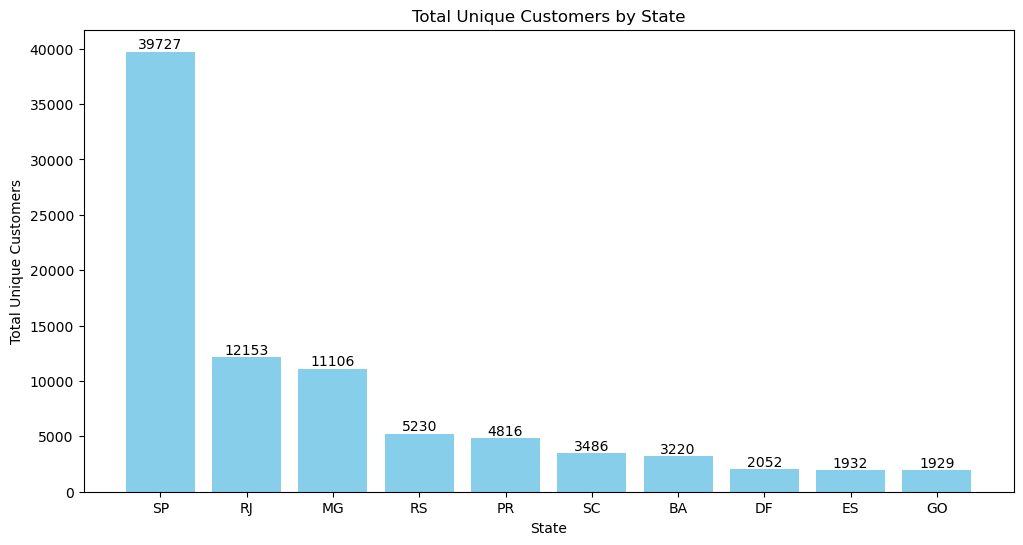

In [9]:
# Mengurutkan DataFrame dari yang terendah hingga tertinggi berdasarkan total pelanggan unik
top_10_state = top_10_state.sort_values(by='customer_unique_id', ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_state['address_static'], top_10_state['customer_unique_id'], color='skyblue')

# Menambahkan angka di dalam bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Total Unique Customers by State')
plt.xlabel('State')
plt.ylabel('Total Unique Customers')
plt.show()

### 6.2

Create a grouping to calculate the total unique customer id based on the address
city and its visualization

In [10]:
# 6.2
# Menghitung total unique customer id berdasarkan address city
unique_customers_by_city = df_cleaned.groupby('address_city')['customer_unique_id'].nunique().reset_index()

# Mengambil 20 kota teratas berdasarkan jumlah pelanggan unik
top_20_cities = unique_customers_by_city.nlargest(20, 'customer_unique_id')

# Menampilkan hasil unique_customers_by_city
top_20_cities

,address_city,customer_unique_id
3586,sao paulo,14759
3146,rio de janeiro,6500
452,belo horizonte,2637
557,brasilia,2046
1141,curitiba,1447
705,campinas,1372
2955,porto alegre,1312
3238,salvador,1178
1526,guarulhos,1131
3419,sao bernardo do campo,896


In [11]:
# Menghapus duplikasi pada kolom customer_id
df_cleaned.dropna(subset=['customer_id'], inplace=True)
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]
df_cleaned['customer_id']

0         06b8999e2fba1a1fbc88172c00ba8bc7
1         18955e83d337fd6b2def6b18a428ac77
2         4e7b3e00288586ebd08712fdd0374a03
3         b2b6027bc5c5109e529d4dc6358b12c3
4         4f2d8ab171c80ec8364f7c12e35b23ad
                        ...               
119138    17ddf5dd5d51696bb3d7c6291687be6f
119139    e7b71a9017aa05c9a7fd292d714858e8
119140    5e28dfe12db7fb50a4b2f691faecea5e
119141    56b18e2166679b8a959d72dd06da27f9
119142    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 117329, dtype: object

### 6.3

Make a table regarding the total orders for each customer, then create a column
that describes the frequency of orders for each customer

In [12]:
# 6.3
# Menghitung total orders untuk setiap customer
total_orders_per_customer = df_cleaned.groupby('customer_id')['order_id'].count().reset_index()
total_orders_per_customer.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Menambahkan kolom frekuensi pesanan
total_orders_per_customer['frequency'] = total_orders_per_customer['total_orders'].apply(lambda x: 'little' if x < 5 else 'a lot')

# Menampilkan hasil
total_orders_per_customer.sort_values('frequency')

,customer_id,total_orders,frequency
23818,3e337c99e0f5ff7ba9a4b98fbf7412fd,5,a lot
16121,2a0bf30f53d53c759be496caad1e1ae2,5,a lot
39473,679f84ceb2ee4ca5bca0c3ea34647746,8,a lot
37402,620732fed5579e0bdfdddee02aad4c54,6,a lot
666,01bb4e5dc779fa3f09a2c2cdf9561f7a,5,a lot
...,...,...,...
32755,55dacd547a813a182aa5c6033382abf8,1,little
32754,55da8ccddd5fcac5a10a7887375c5646,1,little
32753,55da05e5440856411761c20733229b13,1,little
32762,55df88ccac9c2a755f131feb3f74bc6f,1,little


### 6.4

Create a table that lists the rst and last purchase dates for each customer, then
combine the rst purchase, last purchase, and total order tables to generate the
difference total order between the last purchase date and the rst purchase date

In [13]:
# 6.4
# Menghitung tanggal pembelian pertama dan terakhir untuk setiap customer
first_last_purchase = df_cleaned.groupby('customer_id').agg(
    first_purchase=('order_purchase_timestamp', 'min'),
    last_purchase=('order_purchase_timestamp', 'max'),
    total_orders=('order_id', 'count')
).reset_index()

# Menghitung selisih total order antara tanggal pembelian terakhir dan pertama
first_last_purchase['order_difference'] = (first_last_purchase['last_purchase'] - first_last_purchase['first_purchase']).dt.days

# Menampilkan hasil
first_last_purchase

,customer_id,first_purchase,last_purchase,total_orders,order_difference
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,2017-11-14 16:08:26,1,0
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,2017-07-16 09:40:32,1,0
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,2017-02-28 11:06:43,1,0
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,2017-08-16 13:09:20,1,0
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,2018-04-02 13:42:17,1,0
...,...,...,...,...,...
97911,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,2018-03-17 00:55:27,1,0
97912,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,2018-03-29 16:59:26,3,0
97913,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,2018-05-22 13:36:02,1,0
97914,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,2018-06-13 16:57:05,1,0


## 6.5. What are conclusions from your exploratory?

Berdasarkan hasil yang diperoleh, terlihat bahwa 10 besar kota dengan jumlah pelanggan terbanyak adalah sebagai berikut: peringkat pertama ditempati oleh Kota São Paulo dengan 14.759 pelanggan, diikuti oleh Rio de Janeiro di peringkat kedua dengan 6.500 pelanggan, dan Belo Horizonte di peringkat ketiga dengan 2.637 pelanggan. Sementara itu, di posisi ke-10 terdapat Kota Jundiaí dengan 541 pelanggan.

# Step 7 Order Behaviour

In [15]:
# 7.1
# Menghitung rata-rata jumlah item yang dipesan berdasarkan total pelanggan
average_items_per_customer = df_cleaned.groupby('customer_unique_id')['order_id'].count().reset_index()
average_items_per_customer.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Menghitung rata-rata jumlah item per order
average_items_per_customer['average_items'] = average_items_per_customer['total_orders'] / df_cleaned['customer_unique_id'].nunique()

# Menambahkan kolom frekuensi pesanan
average_items_per_customer['frequency'] = average_items_per_customer['total_orders'].apply(lambda x: 'little' if x <= 5 else 'a lot')

# Menampilkan hasil
average_items_per_customer.sort_values('total_orders', ascending=False)

,customer_unique_id,total_orders,average_items,frequency
57213,9a736b248f67d166d2fbb006bcb877c3,75,0.000792,a lot
41437,6fbc7cdadbb522125f4b27ae9dee4060,38,0.000401,a lot
92432,f9ae226291893fda10af7965268fb7f6,35,0.000370,a lot
51436,8af7ac63b2efbcbd88e5b11505e8098a,29,0.000306,a lot
32131,569aa12b73b5f7edeaa6f2a01603e381,26,0.000274,a lot
...,...,...,...,...
34047,5b9a423471efacaa2b6d3ff74db0a572,1,0.000011,little
34046,5b99cd9116cb95dca128af1688ceb0bc,1,0.000011,little
34045,5b99b037dd23d71e703eeb9a1f643cda,1,0.000011,little
34043,5b990a40f0cc96373130487e69d4345f,1,0.000011,little


In [37]:
# 7.2
# Mengonversi kolom 'product_weight_g' menjadi tipe numerik
df_cleaned.loc[:, ['product_weight_g']] = pd.to_numeric(df_cleaned['product_weight_g'], errors='coerce')

# Memeriksa apakah ada nilai null setelah konversi
if df_cleaned['product_weight_g'].isnull().any():
    df_cleaned = df_cleaned.dropna(subset=['product_weight_g'])

# Menghitung rata-rata dan standar deviasi berat item
average_weight = df_cleaned.groupby('order_id')['product_weight_g'].agg(['mean', 'std']).reset_index()
average_weight.rename(columns={'mean': 'average_weight', 'std': 'std_weight'}, inplace=True)

# Menampilkan hasil
average_weight.sort_values('std_weight', ascending=False)

,order_id,average_weight,std_weight
17024,2ce3c61f3add382691fcad6a04f52680,15125.000000,21036.426740
22194,3a1756d7060a993e85f1614b43da0c03,16005.000000,19791.918805
46667,7a35319beabf36472c45cc9ba67f0745,10284.333333,15796.709668
21436,383730d8be253fb34891920a417f2861,11850.000000,15485.638508
39731,67f05f6d7d84bf6e1abf7d7d8e8a41e3,19075.000000,15450.283169
...,...,...,...
97895,fffc94f6ce00a00581880bf54a75a037,10150.000000,NaN
97896,fffcd46ef2263f404302a634eb57f7eb,8950.000000,NaN
97897,fffce4705a9662cd70adb13d4a31832d,967.000000,NaN
97898,fffe18544ffabc95dfada21779c9644f,100.000000,NaN


In [17]:
# 7.3
# Mengklasifikasikan waktu (pagi, sore, malam)
def classify_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'

df_cleaned.loc[:, 'classify_time'] = df_cleaned['hour'].apply(classify_time)

# Menghitung frekuensi pesanan berdasarkan bulan, hari, dan waktu
most_frequent_order_times = df_cleaned.groupby(['month', 'day', 'classify_time']).size().reset_index(name='frequency')

# Menampilkan hasil
#most_frequent_order_times.sort_values('frequency', ascending=False)
most_frequent_order_times

,month,day,classify_time,frequency
0,April,Friday,afternoon,525
1,April,Friday,morning,371
2,April,Friday,night,453
3,April,Monday,afternoon,738
4,April,Monday,morning,450
...,...,...,...,...
247,September,Tuesday,morning,209
248,September,Tuesday,night,295
249,September,Wednesday,afternoon,293
250,September,Wednesday,morning,206


In [18]:
# 7.4
# Menghitung rata-rata total order value per order
average_order_value = df_cleaned.groupby('customer_unique_id')['total_order_value'].mean().reset_index()
average_order_value.rename(columns={'total_order_value': 'average_order_value'}, inplace=True)

# Mengklasifikasikan harga rata-rata
def classify_price(price):
    if price > 2500:
        return 'expensive'
    elif 1000 <= price <= 2500:
        return 'normal'
    else:
        return 'cheap'

average_order_value['price_class'] = average_order_value['average_order_value'].apply(classify_price)

# Menampilkan hasil
average_order_value.sort_values('average_order_value', ascending=False)

,customer_unique_id,average_order_value,price_class
81614,dc4802a71eae9be1dd28f5d788ceb526,6929.310000,expensive
94423,ff4159b92c40ebe40454e3e6a7c35ed6,6726.660000,expensive
88393,eebb5dda148d3893cdaf5b5ca3040ccb,4764.340000,expensive
27038,48e1ac109decbb87765a3eade6854098,4681.780000,expensive
88094,edde2314c6c30e864a128ac95d6b2112,4513.320000,expensive
...,...,...,...
41302,6f5b9d1cdccc4d28f0483a612edecacf,11.630000,cheap
66426,b33336f46234b24a613ad9064d13106d,10.890000,cheap
70046,bd06ce0e06ad77a7f681f1a4960a3cc6,10.070000,cheap
18386,317cfc692e3f86c45c95697c61c853a6,9.590000,cheap


In [19]:
print(df_cleaned['total_order_value'])

0         146.87
1         335.48
2         157.73
3         173.30
4         252.25
           ...  
119138     88.78
119139    129.06
119140     56.04
119141    711.07
119142     21.77
Name: total_order_value, Length: 117309, dtype: float64


In [21]:
# 7.5
# Menghitung metode pembayaran paling populer
popular_payment_methods = df_cleaned['payment_type'].value_counts().reset_index()
popular_payment_methods.columns = ['payment_type', 'frequency']

popular_payment_methods

,payment_type,frequency
0,credit_card,86506
1,boleto,22831
2,voucher,6280
3,debit_card,1692


In [22]:
df_payment_method = df_cleaned.groupby(['product_category_name','payment_type'])['freight_value'].count().reset_index()
df_payment_method.rename(columns={'freight_value': 'quantity'}, inplace=True)
df_payment_method.sort_values('quantity',ascending=False)
df_payment_method.groupby('product_category_name')

df_payment_method

,product_category_name,payment_type,quantity
0,,boleto,314
1,,credit_card,1216
2,,debit_card,29
3,,voucher,117
4,agro_industria_e_comercio,boleto,60
...,...,...,...
269,telefonia_fixa,voucher,10
270,utilidades_domesticas,boleto,1318
271,utilidades_domesticas,credit_card,5397
272,utilidades_domesticas,debit_card,114


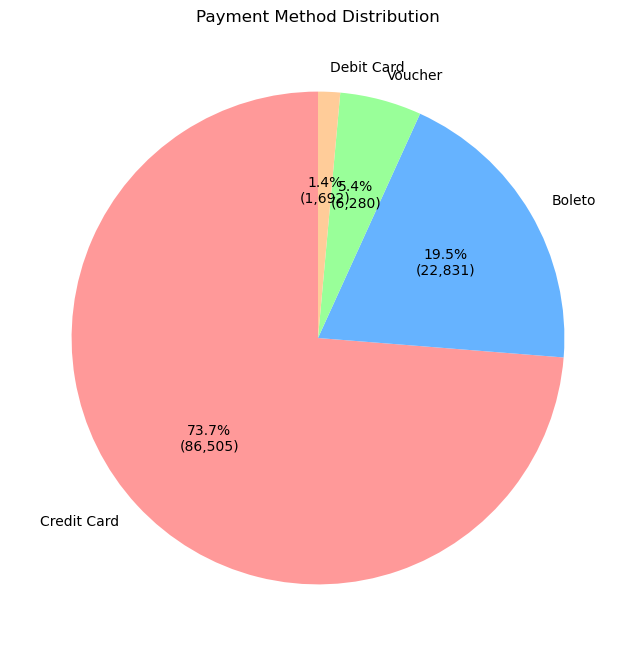

In [24]:
# Data
payment_methods = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card']
values = [86506, 22831, 6280, 1692]

# Create Pie Chart with values below percentages
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    values, 
    labels=payment_methods, 
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(values)):,})', 
    startangle=90, 
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
)

# Format text for better visibility
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(10)

plt.title('Payment Method Distribution')
plt.show()

In [25]:
# 7.6
# Menghitung kategori paling banyak dipesan setiap tahun
most_ordered_categories = df_cleaned.groupby(['year', 'product_category_name']).size().reset_index(name='frequency')
most_ordered_categories = most_ordered_categories.sort_values(by=['frequency', 'year'], ascending=[False, True])

# Menampilkan hasil
most_ordered_categories

,year,product_category_name,frequency
119,2018,cama_mesa_banho,6135
117,2018,beleza_saude,6080
46,2017,cama_mesa_banho,5704
150,2018,informatica_acessorios,4858
138,2018,esporte_lazer,4647
...,...,...,...
16,2016,fashion_roupa_masculina,1
18,2016,fraldas_higiene,1
21,2016,livros_interesse_geral,1
22,2016,livros_tecnicos,1


In [26]:
# most order in 2016, 2017, dan 2018
df_2016 = most_ordered_categories.query('year == 2016').sort_values('frequency',ascending=False)
df_2017 = most_ordered_categories.query('year == 2017').sort_values('frequency',ascending=False)
df_2018 = most_ordered_categories.query('year == 2018').sort_values('frequency',ascending=False)

In [27]:
# how are the categories developing each, top 20 sales each year
df_2016 = df_2016.head(20)
df_2017 = df_2017.head(20)
df_2018 = df_2018.head(20)
df_top_categories = pd.concat([df_2016,df_2017,df_2018])

df_top20 = df_top_categories.pivot(index='product_category_name',columns='year',values='frequency').fillna(0)
df_top20

year,2016,2017,2018
product_category_name,,,
,0.0,957.0,0.0
automotivo,12.0,1647.0,2697.0
bebes,14.0,1310.0,1853.0
beleza_saude,48.0,3816.0,6080.0
brinquedos,25.0,2679.0,1542.0
cama_mesa_banho,8.0,5704.0,6135.0
climatizacao,10.0,0.0,0.0
consoles_games,10.0,0.0,0.0
construcao_ferramentas_construcao,0.0,0.0,815.0


In [28]:
# Menghitung total frekuensi untuk setiap kategori  
df_top20['total_frequency'] = df_top20.sum(axis=1)  
  
# Mengurutkan kategori berdasarkan total frekuensi  
df_top20_sorted = df_top20.sort_values(by='total_frequency', ascending=False)  
  
# Mengambil 20 kategori teratas  
df_top20_final = df_top20_sorted.head(20)  
  
# Menghapus kolom total_frequency jika tidak diperlukan  
df_top20_final = df_top20_final.drop(columns=['total_frequency'])  
  
# Menampilkan hasil akhir  
df_top20_final

year,2016,2017,2018
product_category_name,,,
cama_mesa_banho,8.0,5704.0,6135.0
beleza_saude,48.0,3816.0,6080.0
esporte_lazer,19.0,4276.0,4647.0
moveis_decoracao,80.0,4388.0,4275.0
informatica_acessorios,24.0,3223.0,4858.0
utilidades_domesticas,12.0,3092.0,4227.0
relogios_presentes,5.0,2347.0,3809.0
telefonia,11.0,2270.0,2411.0
ferramentas_jardim,5.0,2605.0,1948.0


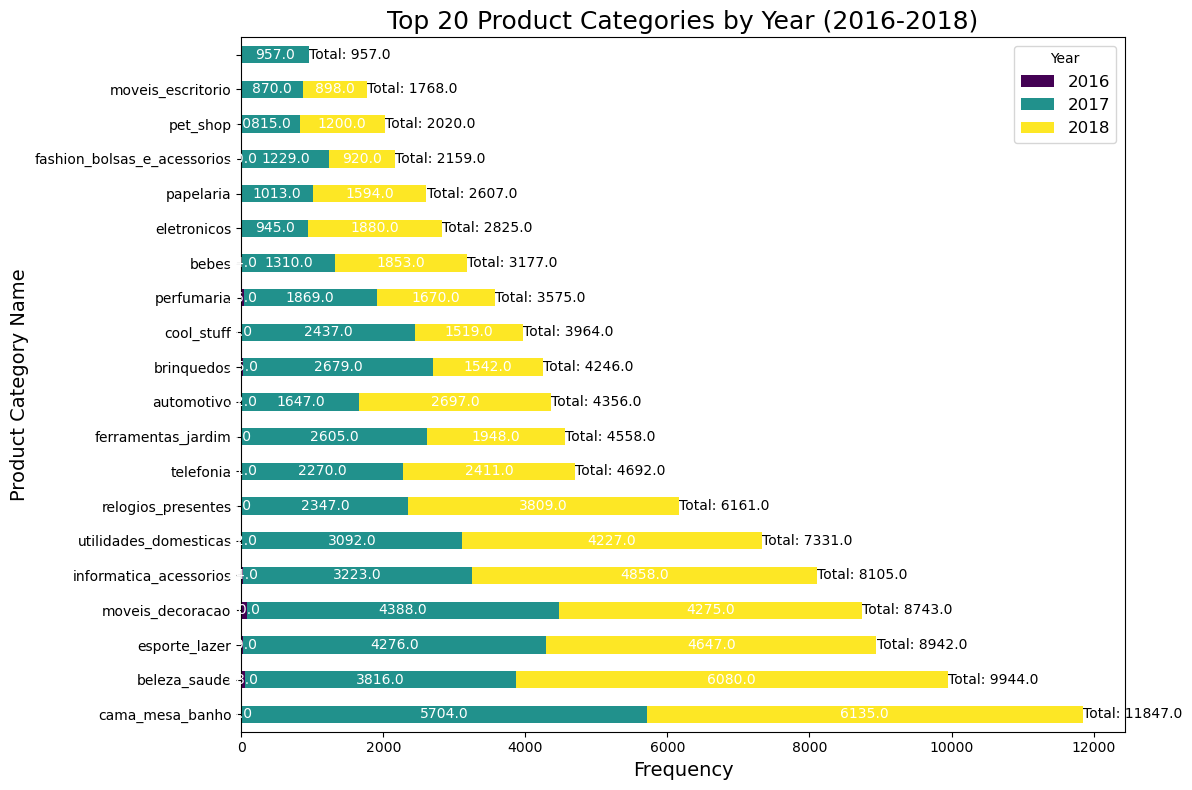

In [29]:
# Membuat grafik batang
plt.figure(figsize=(14, 8))
ax = df_top20_final.plot(
    kind='barh', 
    stacked=True, 
    colormap='viridis', 
    figsize=(12, 8), 
    ax=plt.gca()
)

# Menambahkan anotasi untuk setiap segmen batang
for i, category in enumerate(df_top20_final.index):
    cumulative = 0
    for year in df_top20_final.columns:
        value = df_top20_final.loc[category, year]
        if value > 0:  # Tambahkan anotasi hanya jika nilai lebih dari 0
            ax.text(
                cumulative + value / 2, 
                i, 
                f'{value}', 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='white'
            )
        cumulative += value

# Menambahkan anotasi total nilai di sisi kanan grafik
totals = df_top20_final.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(
        total + 2,  # Memberi jarak sedikit dari ujung batang
        i, 
        f'Total: {total}', 
        va='center', 
        fontsize=10, 
        color='black'
    )

# Menambahkan label, judul, dan legenda
plt.title('Top 20 Product Categories by Year (2016-2018)', fontsize=18)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Product Category Name', fontsize=14)
plt.legend(title='Year', fontsize=12, loc='upper right')
plt.tight_layout()

# Menampilkan grafik
plt.show()

7.6 What are the most ordered categories each year and how are the categories
developing each year?

cama_mesa_banho

# STEP 8 Review Customer

In [30]:
#8
# Menghitung rata-rata skor ulasan untuk setiap pelanggan
average_review_score = df_cleaned.groupby('customer_id')['review_score'].mean().reset_index()

# Menambahkan kolom untuk tingkat kepuasan
average_review_score['satisfaction_level'] = average_review_score['review_score'].apply(lambda x: 'satisfied' if x in [4, 5] else 'not satisfied')

# Menampilkan hasil
average_review_score

,customer_id,review_score,satisfaction_level
0,00012a2ce6f8dcda20d059ce98491703,1.0,not satisfied
1,000161a058600d5901f007fab4c27140,4.0,satisfied
2,0001fd6190edaaf884bcaf3d49edf079,5.0,satisfied
3,0002414f95344307404f0ace7a26f1d5,5.0,satisfied
4,000379cdec625522490c315e70c7a9fb,4.0,satisfied
...,...,...,...
97895,fffcb937e9dd47a13f05ecb8290f4d3e,5.0,satisfied
97896,fffecc9f79fd8c764f843e9951b11341,3.0,not satisfied
97897,fffeda5b6d849fbd39689bb92087f431,4.0,satisfied
97898,ffff42319e9b2d713724ae527742af25,5.0,satisfied


In [31]:
# Memilih pelanggan yang mengisi judul dan pesan ulasan
filtered_reviews = df_cleaned[df_cleaned['review_comment_title'].notnull() & df_cleaned['review_comment_message'].notnull()]

# Menghitung total ulasan untuk setiap pelanggan
total_reviews_per_customer = filtered_reviews.groupby('customer_id').size().reset_index(name='total_reviews')

# Menghitung total pesanan untuk setiap pelanggan
total_orders_per_customer = df_cleaned.groupby('customer_id')['order_id'].count().reset_index()
total_orders_per_customer.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Menggabungkan tabel total ulasan dan total pesanan
review_ratio = pd.merge(total_reviews_per_customer, total_orders_per_customer, on='customer_id', how='left')

# Menghitung rasio ulasan per transaksi
review_ratio['review_ratio'] = review_ratio['total_reviews'] / review_ratio['total_orders']

# Menampilkan hasil
review_ratio.sort_values('total_reviews', ascending=False)

,customer_id,total_reviews,total_orders,review_ratio
14967,270c23a11d024a44c896d1894b261a83,63,63,1.0
7466,13aa59158da63ba0e93ec6ac2c07aacb,38,38,1.0
59272,9af2372a1e49340278e7c1ef8d749f34,29,29,1.0
56078,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,26,1.0
51467,86cc80fef09f7f39df4b0dbce48e81cb,24,24,1.0
...,...,...,...,...
34897,5b8e049fbfe38e8fbf483c7db46ae8b5,1,1,1.0
34896,5b8c12a0c8d2c8367265925a67d3fb87,1,1,1.0
34894,5b89802df153a87a24a6f52d70b239fa,1,1,1.0
34893,5b894cf9a0b95ce53a6ce010fe000104,1,1,1.0


In [32]:
# Memilih pelanggan yang mengisi judul dan pesan ulasan
filtered_reviews = df_cleaned[df_cleaned['review_comment_title'].notnull() & df_cleaned['review_comment_message'].notnull()]

# Menghitung total ulasan untuk setiap pelanggan
total_reviews_per_customer = filtered_reviews.groupby('customer_id').size().reset_index(name='total_reviews')

# Menghitung total pesanan untuk setiap pelanggan
total_orders_per_customer = df_cleaned.groupby('customer_id')['order_id'].count().reset_index()
total_orders_per_customer.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Menggabungkan tabel total ulasan dan total pesanan
review_ratio = pd.merge(total_reviews_per_customer, total_orders_per_customer, on='customer_id', how='left')

# Menghitung rasio ulasan per transaksi
review_ratio['review_ratio'] = review_ratio['total_reviews'] / review_ratio['total_orders']

# Menampilkan hasil
review_ratio.sort_values('total_reviews', ascending=False)

,customer_id,total_reviews,total_orders,review_ratio
14967,270c23a11d024a44c896d1894b261a83,63,63,1.0
7466,13aa59158da63ba0e93ec6ac2c07aacb,38,38,1.0
59272,9af2372a1e49340278e7c1ef8d749f34,29,29,1.0
56078,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,26,1.0
51467,86cc80fef09f7f39df4b0dbce48e81cb,24,24,1.0
...,...,...,...,...
34897,5b8e049fbfe38e8fbf483c7db46ae8b5,1,1,1.0
34896,5b8c12a0c8d2c8367265925a67d3fb87,1,1,1.0
34894,5b89802df153a87a24a6f52d70b239fa,1,1,1.0
34893,5b894cf9a0b95ce53a6ce010fe000104,1,1,1.0


# Step 9 Time Series Analysis

In [33]:
# Menjumahkan penjualan tiap item per hari
daily_sales = df_cleaned[['day','month','year','product_id']].sort_values('year')
daily_sales.rename(columns={'product_id': 'item_sales'}, inplace=True)
daily_sales = daily_sales.groupby(['year','month','day'])['item_sales'].count().reset_index()
daily_sales

,year,month,day,item_sales
0,2016,December,Friday,1
1,2016,October,Friday,50
2,2016,October,Monday,54
3,2016,October,Saturday,46
4,2016,October,Sunday,37
...,...,...,...,...
146,2018,May,Sunday,809
147,2018,May,Thursday,1259
148,2018,May,Tuesday,1539
149,2018,May,Wednesday,1509


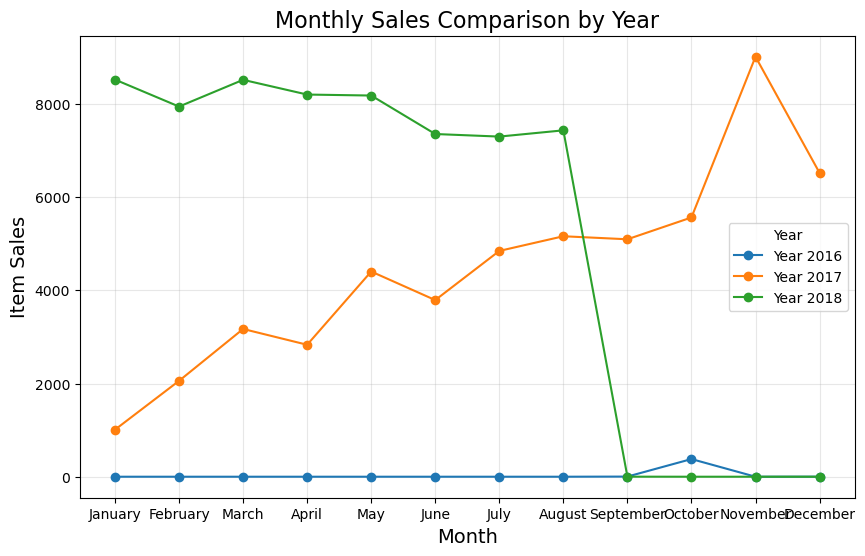

In [34]:
# Pastikan urutan bulan yang benar
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Ubah kolom 'month' menjadi tipe kategori dengan urutan yang benar
daily_sales['month'] = pd.Categorical(daily_sales['month'], categories=month_order, ordered=True)

# Kelompokkan data berdasarkan tahun dan bulan
monthly_sales_one = daily_sales.groupby(['year', 'month'], observed=False)['item_sales'].sum().reset_index()

# Pivot data agar siap untuk line chart (bulan di sumbu x, tahun di garis terpisah)
pivot_sales = monthly_sales_one.pivot(index='month', columns='year', values='item_sales')

# Plot line chart
plt.figure(figsize=(10, 6))
for year in pivot_sales.columns:
    plt.plot(pivot_sales.index, pivot_sales[year], marker='o', label=f'Year {year}')

# Menambahkan label, judul, dan sumbu x
plt.title('Monthly Sales Comparison by Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Item Sales', fontsize=14)

plt.legend(title='Year')
plt.grid(alpha=0.3)

# Tampilkan grafik
plt.show()

In [35]:
# Menghitung total pesanan per hari dalam seminggu
weekly_orders = df_cleaned.groupby('day')['order_id'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Mengganti nama kolom
weekly_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Menampilkan hasil
weekly_orders

,day,total_orders
0,Monday,19031
1,Tuesday,19052
2,Wednesday,18298
3,Thursday,17565
4,Friday,16760
5,Saturday,12678
6,Sunday,13925


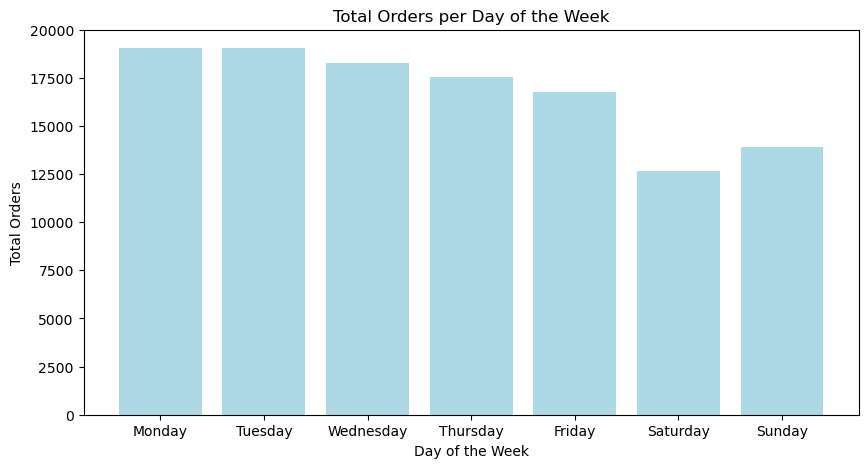

In [36]:
# Visualisasi
plt.figure(figsize=(10, 5))
plt.bar(weekly_orders['day'], weekly_orders['total_orders'], color='lightblue')
plt.title('Total Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.show()